# 📥 Tahap 1A — Membaca dan Menampilkan Dataset Mentah

Dataset yang digunakan terdiri dari:
- Harga saham ANTM (`antm_10y.csv`)
- Indeks IHSG (`ihsg_10y.csv`)
- Harga Emas Dunia (`emas_10y.csv`)
- Kurs USD/IDR (`usd_idr_10y.csv`)

Langkah pertama ini akan memuat semua file dan menampilkan 5 baris pertama untuk masing-masing.


## 🔄 Simpan Data ke Dalam Dictionary
Untuk mempermudah proses selanjutnya seperti cleaning, normalisasi, visualisasi, dan penyimpanan, seluruh dataset disimpan ke dalam struktur `dictionary` Python bernama `data`. Setiap key mewakili nama dataset (`'antm'`, `'ihsg'`, `'emas'`, `'usd'`), dan value-nya berupa DataFrame dari masing-masing CSV.

In [4]:
# Tahap 1A: Membaca file CSV mentah

import pandas as pd

# Membaca semua file dari folder data/raw/
antm = pd.read_csv('../data/raw/antm_10y.csv')
ihsg = pd.read_csv('../data/raw/ihsg_10y.csv')
emas = pd.read_csv('../data/raw/emas_10y.csv')
usd  = pd.read_csv('../data/raw/usd_idr_10y.csv')

# Tampilkan isi awal masing-masing dataset
print("📊 ANTM Data:")
display(antm.head())

print("\n📈 IHSG Data:")
display(ihsg.head())

print("\n💰 EMAS Data:")
display(emas.head())

print("\n💵 USD/IDR Data:")
display(usd.head())

# Simpan ke dalam dictionary untuk kemudahan akses
data = {
    'antm': antm,
    'ihsg': ihsg,
    'emas': emas,
    'usd': usd
}

📊 ANTM Data:


,Date,Price,Open,High,Low,Vol.,Change %
0,06/20/2025,"3,200","3,330","3,340","3,160",223.74M,-3.90%
1,06/19/2025,"3,330","3,560","3,580","3,300",230.24M,-6.20%
2,06/18/2025,"3,550","3,500","3,590","3,470",242.73M,2.31%
3,06/17/2025,"3,470","3,280","3,490","3,240",289.46M,5.79%
4,06/16/2025,"3,280","3,330","3,370","3,230",177.10M,-0.61%



📈 IHSG Data:


,Date,Price,Open,High,Low,Vol.,Change %
0,06/20/2025,"6,907.14","6,948.28","6,956.81","6,873.72",33.16B,-0.88%
1,06/19/2025,"6,968.64","7,107.79","7,115.90","6,935.01",22.22B,-1.96%
2,06/18/2025,"7,107.79","7,155.12","7,166.67","7,089.46",18.04B,-0.67%
3,06/17/2025,"7,155.85","7,163.03","7,181.47","7,143.60",17.30B,0.54%
4,06/16/2025,"7,117.59","7,158.90","7,211.54","7,117.59",22.46B,-0.68%



💰 EMAS Data:


,Date,Price,Open,High,Low,Vol.,Change %
0,06/23/2025,"3,370.75","3,388.42","3,389.27","3,367.72",28.05K,-0.52%
1,06/22/2025,"3,388.35","3,401.05","3,411.55","3,387.05",16.24K,0.08%
2,06/20/2025,"3,385.70","3,387.10","3,405.20","3,356.20",276.83K,0.02%
3,06/19/2025,"3,384.97","3,391.81","3,404.95","3,363.81",136.01K,-0.68%
4,06/18/2025,"3,408.10","3,409.00","3,419.00","3,380.10",178.28K,0.04%



💵 USD/IDR Data:


,Date,Price,Open,High,Low,Vol.,Change %
0,06/23/2025,"16,458.2","16,356.9","16,463.7","16,373.5",NaN,0.52%
1,06/22/2025,"16,373.5","16,356.9","16,438.0","16,373.5",NaN,-0.07%
2,06/20/2025,"16,385.0","16,372.5","16,412.5","16,362.5",NaN,-0.06%
3,06/19/2025,"16,395.0","16,350.0","16,412.5","16,342.0",NaN,0.58%
4,06/18/2025,"16,300.0","16,310.0","16,330.0","16,295.0",NaN,0.12%


# 🧹 Tahap 1B — Standarisasi Kolom Harga & Format Tanggal

Langkah ini bertujuan untuk:
- Menyamakan nama kolom harga penutupan menjadi `Close`
- Mengonversi kolom `Date` ke format `datetime`
- Merename kolom `Close` menjadi `{NAMA_DATASET}_Close` agar unik saat digabung

Proses ini dilakukan menggunakan fungsi `prepare_dataframe()` dan diterapkan secara otomatis pada setiap item dalam dictionary `data`.


In [5]:
def prepare_dataframe(df, nama_dataset):
    df = df.copy()

    # 1. Bersihkan kolom dari spasi atau karakter aneh
    df.columns = df.columns.str.strip()  # hilangkan spasi depan belakang
    df.columns = df.columns.str.replace('.', '', regex=False)  # hilangkan titik
    df.columns = df.columns.str.replace('%', '', regex=False)  # hilangkan simbol persen

    # 2. Ganti nama kolom harga penutupan jadi 'Close' (cari 'Price', 'Last', dll)
    for col in df.columns:
        if col.lower() in ['price', 'last', 'close', 'terakhir', 'harga']:
            df.rename(columns={col: 'Close'}, inplace=True)
            break

    # 3. Ubah tanggal (parse otomatis dan toleran)
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

    # 4. Urutkan tanggal dan reset index
    df = df.sort_values('Date').reset_index(drop=True)

    # 5. Ambil hanya Date dan Close
    if 'Close' in df.columns:
        df = df[['Date', 'Close']]
        df.rename(columns={'Close': f'{nama_dataset.upper()}_Close'}, inplace=True)
    else:
        print(f"[⚠️] Kolom harga tidak ditemukan dalam dataset: {nama_dataset}")

    return df


## 🔁 Terapkan Fungsi pada Seluruh Dataset
Menggunakan struktur dictionary `data`, kita terapkan fungsi `prepare_dataframe()` ke semua DataFrame secara otomatis.


In [6]:
# Terapkan ulang ke seluruh data
for name in data:
    data[name] = prepare_dataframe(data[name], name)

# Validasi hasil
for name, df in data.items():
    print(f"\n📋 {name.upper()} after prepare_dataframe():")
    display(df.head(3))


📋 ANTM after prepare_dataframe():


,Date,ANTM_Close
0,2015-01-02,878
1,2015-01-05,874
2,2015-01-06,861



📋 IHSG after prepare_dataframe():


,Date,IHSG_Close
0,2015-01-02,"5,242.77"
1,2015-01-05,"5,219.99"
2,2015-01-06,"5,169.06"



📋 EMAS after prepare_dataframe():


,Date,EMAS_Close
0,2015-01-02,"1,186.20"
1,2015-01-05,"1,204.00"
2,2015-01-06,"1,219.40"



📋 USD after prepare_dataframe():


,Date,USD_Close
0,2015-01-01,"12,385.0"
1,2015-01-02,"12,542.5"
2,2015-01-05,"12,627.5"


# 🔗 Tahap 1C — Gabungkan dan Filter Dataset (2020–2024)

Dataset dari ANTM, IHSG, Emas, dan USD/IDR akan digabung berdasarkan kolom `Date`.
Selanjutnya, data akan difilter untuk menyisakan rentang tanggal **5 tahun terakhir**:
**01 Januari 2020 hingga 31 Desember 2024**, sesuai rencana pelatihan utama model.

In [7]:
# Tahap 1C: Gabungkan semua dataset berdasarkan kolom 'Date'
from functools import reduce

# Ambil list dataframe dari dictionary data
df_list = list(data.values())

# Lakukan merge bertahap berdasarkan 'Date'
merged_df = reduce(lambda left, right: pd.merge(left, right, on='Date', how='inner'), df_list)

# Tampilkan dimensi awal
print(f"🔍 Dimensi setelah merge: {merged_df.shape}")
display(merged_df.head())

# Filter tanggal hanya 2020–2024
start_date = '2020-01-01'
end_date = '2024-12-31'
filtered_df = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]

print(f"✅ Dimensi setelah filter 2020–2024: {filtered_df.shape}")
display(filtered_df.head())

🔍 Dimensi setelah merge: (2508, 5)


,Date,ANTM_Close,IHSG_Close,EMAS_Close,USD_Close
0,2015-01-02,878,"5,242.77","1,186.20","12,542.5"
1,2015-01-05,874,"5,219.99","1,204.00","12,627.5"
2,2015-01-06,861,"5,169.06","1,219.40","12,657.5"
3,2015-01-07,874,"5,207.12","1,210.70","12,738.5"
4,2015-01-08,937,"5,211.83","1,208.50","12,680.0"


✅ Dimensi setelah filter 2020–2024: (1206, 5)


,Date,ANTM_Close,IHSG_Close,EMAS_Close,USD_Close
1200,2020-01-02,840,"6,283.58","1,528.10","13,889.0"
1201,2020-01-03,850,"6,323.47","1,552.40","13,925.0"
1202,2020-01-06,885,"6,257.40","1,568.80","13,940.0"
1203,2020-01-07,875,"6,279.35","1,574.30","13,875.0"
1204,2020-01-08,905,"6,225.69","1,560.20","13,892.5"


In [8]:
# Simpan hasil ke folder processed
output_path = '../data/processed/merged_5y.csv'
filtered_df.to_csv(output_path, index=False)
print(f"📁 Data berhasil disimpan ke: {output_path}")

📁 Data berhasil disimpan ke: ../data/processed/merged_5y.csv


# 🔧 Tahap 2A — Normalisasi Data dan Visualisasi

Data multivariat hasil penggabungan (ANTM, IHSG, Emas, USD/IDR) akan dinormalisasi menggunakan teknik **Min-Max Scaling**, agar setiap fitur berada dalam rentang [0, 1].  
Normalisasi penting untuk mempercepat proses pelatihan model dan mencegah dominasi fitur dengan skala besar.

Setelah normalisasi, dilakukan visualisasi distribusi nilai setiap fitur untuk memastikan hasilnya valid.

In [10]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Baca ulang file hasil merge (pastikan Date sebagai datetime)
df = pd.read_csv('../data/processed/merged_5y.csv', parse_dates=['Date'])

# Simpan kolom Date agar tidak ikut dinormalisasi
dates = df['Date']
features = df.drop(columns=['Date'])

# Bersihkan format numerik (hapus koma ribuan) dan konversi ke float
features_cleaned = features.applymap(lambda x: str(x).replace(',', '')).astype(float)

# Inisialisasi dan latih MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(features_cleaned)

# Buat DataFrame hasil normalisasi
scaled_df = pd.DataFrame(scaled_values, columns=features.columns)
scaled_df.insert(0, 'Date', dates)

# Simpan ke file
scaled_df.to_csv('../data/processed/merged_5y_scaled.csv', index=False)
print("✅ Data hasil normalisasi berhasil disimpan.")
display(scaled_df.head())

✅ Data hasil normalisasi berhasil disimpan.


C:\Users\User\AppData\Local\Temp\ipykernel_11032\449668517.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  features_cleaned = features.applymap(lambda x: str(x).replace(',', '')).astype(float)


,Date,ANTM_Close,IHSG_Close,EMAS_Close,USD_Close
0,2020-01-02,0.173118,0.591253,0.037947,0.105412
1,2020-01-03,0.176636,0.601307,0.056316,0.117402
2,2020-01-06,0.188951,0.584655,0.068713,0.122398
3,2020-01-07,0.185433,0.590187,0.072870,0.100749
4,2020-01-08,0.195989,0.576663,0.062212,0.106578


## 📊 Visualisasi Distribusi Nilai Setelah Normalisasi

Grafik berikut menunjukkan distribusi masing-masing fitur setelah proses Min-Max Scaling.
Semua nilai diharapkan berada dalam rentang [0, 1].

<Figure size 1200x600 with 0 Axes>

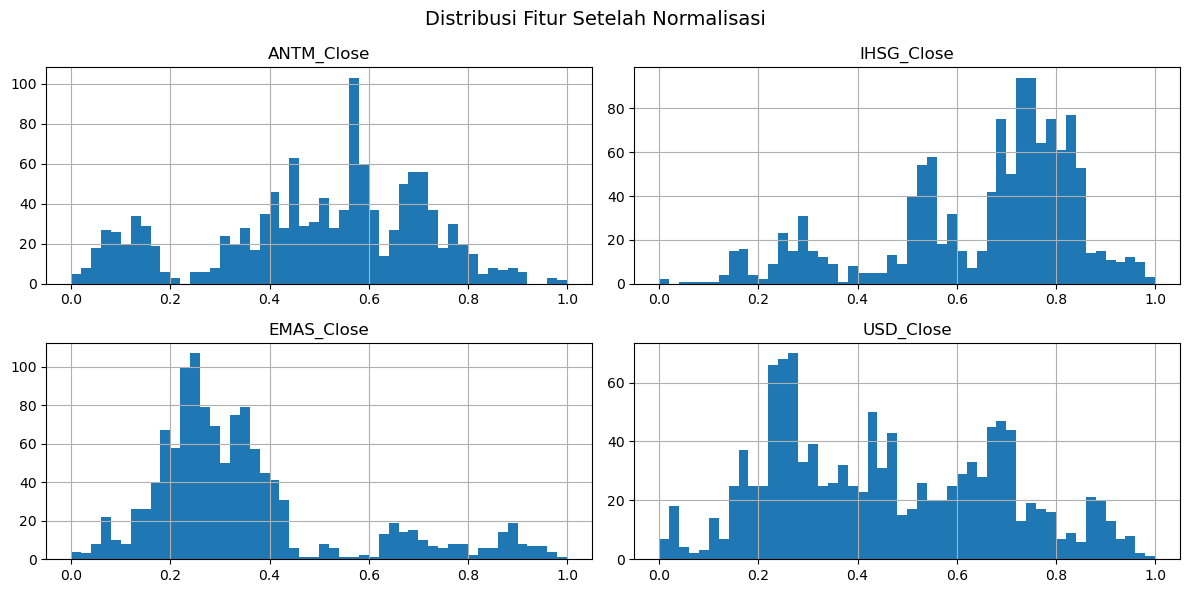

In [11]:
# Plot distribusi setiap fitur
plt.figure(figsize=(12, 6))
scaled_df.drop(columns=['Date']).hist(bins=50, figsize=(12, 6))
plt.suptitle("Distribusi Fitur Setelah Normalisasi", fontsize=14)
plt.tight_layout()
plt.show()

# 🪟 Tahap 2B — Sliding Window: Membentuk X dan y

Model time series seperti CLSTM dan BPNN membutuhkan data dalam bentuk sekuensial.  
Untuk itu, digunakan teknik **sliding window**, di mana setiap `window_size` baris digunakan sebagai input untuk memprediksi baris berikutnya.

Contoh: jika `window_size = 7`, maka:
- X = data hari ke 1 s.d. 7
- y = data hari ke 8 (kolom target)

Proses ini dilakukan pada semua fitur (`ANTM_Close`, `IHSG_Close`, dst.), dan target diambil dari `ANTM_Close`.

In [12]:
import numpy as np

# Load data hasil normalisasi
df = pd.read_csv('../data/processed/merged_5y_scaled.csv', parse_dates=['Date'])

# Ambil hanya kolom fitur (tanpa Date)
feature_columns = df.columns.drop('Date')
data_values = df[feature_columns].values

# Hyperparameter sliding window
window_size = 7  # jumlah hari sebagai input
X, y = [], []

# Buat X dan y dengan sliding window
for i in range(window_size, len(data_values)):
    X.append(data_values[i - window_size:i])
    y.append(data_values[i][0])  # target: kolom pertama = ANTM_Close

# Konversi ke numpy array
X = np.array(X)  # shape: [samples, window_size, features]
y = np.array(y).reshape(-1, 1)  # shape: [samples, 1]

# Untuk BPNN: flatten X
X_flat = X.reshape((X.shape[0], X.shape[1] * X.shape[2]))

# Info bentuk data
print(f"✅ X shape (CLSTM): {X.shape}")
print(f"✅ X_flat shape (BPNN): {X_flat.shape}")
print(f"✅ y shape: {y.shape}")

✅ X shape (CLSTM): (1199, 7, 4)
✅ X_flat shape (BPNN): (1199, 28)
✅ y shape: (1199, 1)


## Simpan ke .npz

In [13]:
# Simpan semua ke file terpisah
np.savez('../data/processed/windowed_antm.npz', X=X, y=y, X_flat=X_flat)
print("📁 Dataset hasil windowing berhasil disimpan ke 'windowed_antm.npz'")

📁 Dataset hasil windowing berhasil disimpan ke 'windowed_antm.npz'
